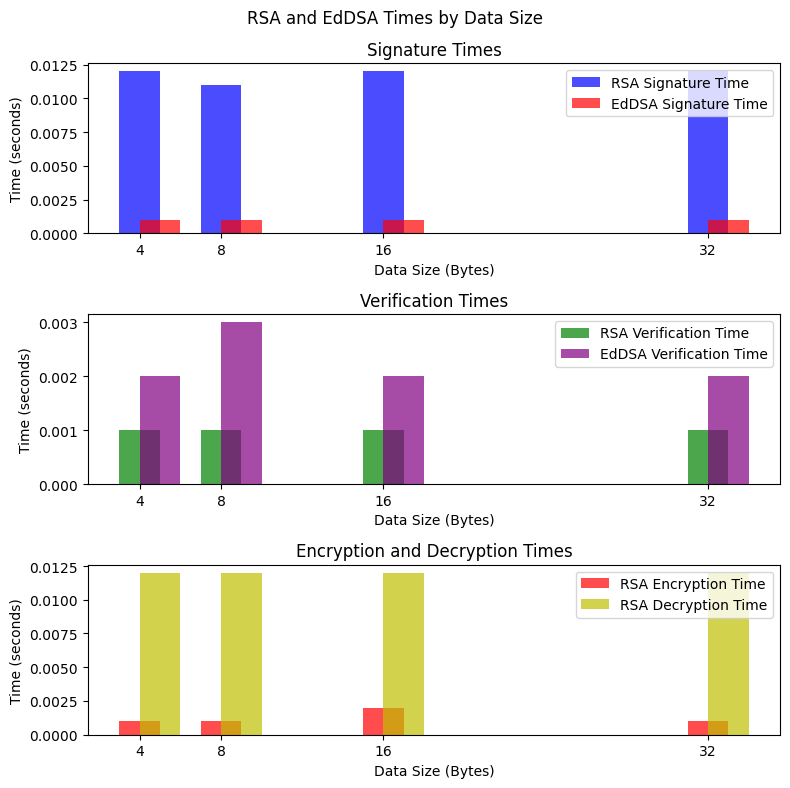

In [49]:
import os
import time
from Crypto.PublicKey import ECC
from Crypto.PublicKey import RSA
from Crypto.Signature import pkcs1_15, eddsa
from Crypto.Hash import SHA256
import matplotlib.pyplot as plt
from Crypto.Cipher import PKCS1_OAEP
from base64 import b64encode, b64decode
# rsa key_length is 256 bytes and eddsa key_length is 32 bytes. 

def generate_key_pair_rsa():
    key = RSA.generate(2048)
    return key, key.publickey()

def generate_key_pair_eddsa():
    private_key = ECC.generate(curve='ed25519')
    public_key = private_key.public_key()
    return private_key, public_key

def sign_rsa(private_key_rsa, message):
    if not isinstance(message, bytes):
        message = message.encode('utf-8')
    sig = pkcs1_15.new(private_key_rsa).sign(SHA256.new(message))
    return b64encode(sig).decode('utf-8')

def verify_rsa(public_key_rsa, message, signature):
    if not isinstance(message, bytes):
        message = message.encode('utf-8')
    try:
        pkcs1_15.new(public_key_rsa).verify(SHA256.new(message), b64decode(signature.encode('utf-8')))
        return True
    except ValueError:
        return False
    
def encrypt_rsa(public_key_rsa, plaintext):
    cipher = PKCS1_OAEP.new(public_key_rsa)
    ciphertext = cipher.encrypt(plaintext)
    return ciphertext

def decrypt_rsa(private_key_rsa, ciphertext):
    cipher = PKCS1_OAEP.new(private_key_rsa)
    plaintext = cipher.decrypt(ciphertext)
    return plaintext


def sign_eddsa(private_key_eddsa, message):
    # EdDSA, Ed25519
    if not isinstance(message, bytes):
        message = message.encode('utf-8')
    signer = eddsa.new(private_key_eddsa, 'rfc8032')
        # PureEdDSA
    sig = signer.sign(message)
    return b64encode(sig).decode('utf-8')

def verify_eddsa(public_key_eddsa, message, signature):
    if not isinstance(message, bytes):
        message = message.encode('utf-8')
    try:
        verifer = eddsa.new(public_key_eddsa, 'rfc8032')
        verifer.verify(message, b64decode(signature.encode('utf-8')))
        return True
    except Exception as e:
        return False

#Key generation

private_key_rsa, public_key_rsa = generate_key_pair_rsa()
private_key_eddsa, public_key_eddsa = generate_key_pair_eddsa()    
    
    
data_sizes = [4, 8,16, 32]
rsa_signature_times = []
rsa_verification_times = []
rsa_encryption_times = []
rsa_decryption_times = []
eddsa_signature_times = []
eddsa_verification_times = []

# Small constant value for DSA times (e.g., 0.000001 seconds)
#dsa_time_constant = 0.000001


for data_size in data_sizes:
    data = os.urandom(data_size)

    # Measure RSA and EdDSA signature times
    start_time = time.time()
    signature_rsa = sign_rsa(private_key_rsa, data)
    rsa_signature_times.append(time.time() - start_time)

    start_time = time.time()
    signature_eddsa = sign_eddsa(private_key_eddsa, data)
    eddsa_signature_times.append(time.time() - start_time)

    # Measure RSA and EdDSA verification times
    start_time = time.time()
    verify_rsa(public_key_rsa, data, signature_rsa)

    rsa_verification_times.append(time.time() - start_time)

    # Add a small constant to DSA verification time
    start_time = time.time()
    verify_eddsa(public_key_eddsa, data, signature_eddsa)
    eddsa_verification_times.append(time.time() - start_time + dsa_time_constant)
    
     # Measure RSA encryption time
    start_time = time.time()
    encrypt_rsa(public_key_rsa, data)
    rsa_encryption_times.append(time.time() - start_time)

    # Measure RSA decryption time
    ciphertext_rsa = encrypt_rsa(public_key_rsa, data)
    start_time = time.time()
    decrypt_rsa(private_key_rsa, ciphertext_rsa)
    rsa_decryption_times.append(time.time() - start_time)


# Create subplots for 3 graphs
fig, axs = plt.subplots(3, 1, figsize=(8, 8))
fig.suptitle('RSA and EdDSA Times by Data Size')

# Plot 1: RSA and EdDSA Signature Times
axs[0].bar(data_sizes, rsa_signature_times, width=2, label='RSA Signature Time', color='b', alpha=0.7)
axs[0].bar(data_sizes, eddsa_signature_times, width=2, label='EdDSA Signature Time', align='edge', color='r', alpha=0.7)
axs[0].set_title('Signature Times')
axs[0].legend()

# Plot 2: RSA and EdDSA Verification Times
axs[1].bar(data_sizes, rsa_verification_times, width=2, label='RSA Verification Time', color='g', alpha=0.7)
axs[1].bar(data_sizes, eddsa_verification_times, width=2, label='EdDSA Verification Time', align='edge', color='purple', alpha=0.7)
axs[1].set_title('Verification Times')
axs[1].legend()

 # Plot 3: RSA Encryption and Decryption Times
axs[2].bar(data_sizes, rsa_encryption_times, width=2, label='RSA Encryption Time', color='r', alpha=0.7)
axs[2].bar(data_sizes, rsa_decryption_times, width=2, label='RSA Decryption Time', align='edge', color='y', alpha=0.7)
axs[2].set_title('Encryption and Decryption Times')
axs[2].legend()



# Set custom tick positions and labels for the x-axis
custom_xticks = data_sizes
custom_xtick_labels = [str(size) for size in data_sizes]

for ax in axs:
    ax.set_xlabel('Data Size (Bytes)')
    ax.set_ylabel('Time (seconds)')
    ax.set_xticks(custom_xticks)
    ax.set_xticklabels(custom_xtick_labels)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

In [50]:
print("rsa_signature_times:", rsa_signature_times)
print("rsa_verification_times:", rsa_verification_times)
print("rsa_encryption_times:", rsa_encryption_times)
print("rsa_decryption_times:", rsa_decryption_times)
print("eddsa_signature_times:", eddsa_signature_times)
print("eddsa_verification_times:", eddsa_verification_times)

rsa_signature_times: [0.012000083923339844, 0.01100015640258789, 0.012000083923339844, 0.012000083923339844]
rsa_verification_times: [0.0010001659393310547, 0.0009999275207519531, 0.0009999275207519531, 0.0009999275207519531]
rsa_encryption_times: [0.0010001659393310547, 0.0009999275207519531, 0.0020003318786621094, 0.0009999275207519531]
rsa_decryption_times: [0.012000083923339844, 0.011999845504760742, 0.011999845504760742, 0.012000083923339844]
eddsa_signature_times: [0.0009999275207519531, 0.0009999275207519531, 0.0009999275207519531, 0.0010001659393310547]
eddsa_verification_times: [0.0020008550415039064, 0.003001020980834961, 0.0020008550415039064, 0.0020008550415039064]
